In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import (ttest_1samp , ttest_rel , ttest_ind , t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram, cut_tree)

In [27]:
# pip install ISLP

In [28]:
from ISLP import load_data
from ISLP.cluster import compute_linkage

## **Q 13.8**

In [10]:
rng = np.random.default_rng(77)
n, m = 20, 100
X = rng.normal(size=(n, m))

In [11]:
X

array([[ 0.42776996, -0.57083756,  2.65446069, ..., -0.20534691,
         0.86529301,  0.03591079],
       [ 1.16898407,  2.51063762, -0.51815783, ...,  0.16062183,
         1.3129026 , -0.69117344],
       [-0.42519309, -0.74972173, -0.13833417, ..., -0.4729296 ,
         0.46382257,  0.86877825],
       ...,
       [-0.57947888, -0.85099309,  1.56390585, ..., -0.12056691,
         0.65434095, -0.55876252],
       [ 0.73472009,  0.54961166,  0.7928086 , ...,  0.18102046,
         1.06620826,  0.55924263],
       [ 0.80605853, -0.01641129,  0.98791259, ...,  0.94794519,
         1.64444946,  0.54308673]])

### **(a)**

In [12]:
p_values = np.empty(100)
true_mean = np.zeros(100)
for i in range(100):
  p_values[i] = ttest_1samp(X[:,i], 0).pvalue
decision = pd.cut(p_values , [0, 0.05, 1], labels=['Reject H0', 'Do not reject H0'])
truth = pd.Categorical(true_mean == 0, categories=[True , False], ordered=True)

([<matplotlib.axis.XTick at 0x7fe4364e3bb0>,
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

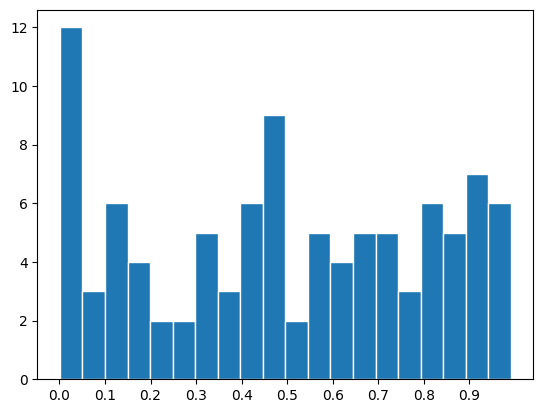

In [13]:
plt.hist(p_values,bins=20,edgecolor='white')
plt.xticks(np.arange(0,1,0.1))

### **(b)**

In [14]:
pd.crosstab(decision, truth, rownames=['Decision'], colnames=['H0'])

H0,True
Decision,
Reject H0,12
Do not reject H0,88


### **(c)**

In [15]:
reject, bonf = mult_test(p_values, method = "bonferroni")[:2]
num_rej_bonf = np.sum(reject*np.ones(100))
print("number of rejection with Bonferroni method =", num_rej_bonf)

number of rejection with Bonferroni method = 0.0


In [16]:
reject, holm = mult_test(p_values, method = "holm", alpha=0.05)[:2]
num_rej_holm = np.sum(reject*np.ones(100))
print("number of rejection with Holm's method =", num_rej_holm)

number of rejection with Holm's method = 0.0


### **(d)**

In [17]:
q_values = mult_test(p_values, method = "fdr_bh")[1]
q_values

array([0.98960162, 0.94823149, 0.95078618, 0.98704084, 0.98960162,
       0.83847606, 0.98624927, 0.98960162, 0.94823149, 0.94823149,
       0.68871132, 0.98960162, 0.67730514, 0.94823149, 0.98960162,
       0.68871132, 0.98960162, 0.98960162, 0.98960162, 0.98960162,
       0.98960162, 0.94823149, 0.94823149, 0.98960162, 0.98960162,
       0.2126287 , 0.94823149, 0.98960162, 0.9513673 , 0.98960162,
       0.98960162, 0.98960162, 0.98960162, 0.98960162, 0.98960162,
       0.79442808, 0.94823149, 0.94823149, 0.94823149, 0.94823149,
       0.95769483, 0.15097526, 0.98960162, 0.60247229, 0.15097526,
       0.98624927, 0.83847606, 0.98028769, 0.98960162, 0.98960162,
       0.70710935, 0.20152707, 0.68871132, 0.94823149, 0.94823149,
       0.94823149, 0.94823149, 0.98960162, 0.79442808, 0.98624927,
       0.99081403, 0.98960162, 0.94823149, 0.94823149, 0.15097526,
       0.67730514, 0.98960162, 0.34754236, 0.98960162, 0.7084739 ,
       0.98960162, 0.98960162, 0.9513673 , 0.94823149, 0.98960

In [18]:
(q_values <= 0.05).sum()

0

### **(e)**

In [19]:
performance = np.sum(X,axis=0)
performance

array([ -0.12588126,  -5.10971433,   3.86368435,   2.75192316,
         0.37732542,  -5.40865239,  -2.2641082 ,   1.16536936,
        -4.7727091 ,  -5.14411145,   6.77899143,   1.61039934,
        -5.11554277,   3.53531225,   0.08901736,   6.66782711,
         0.80797767,  -0.58450994,  -0.6116252 ,   1.22009344,
        -1.74744444,  -4.73241688,   3.94293146,   0.74128386,
         1.09426439,  -7.7304064 ,  -4.49164739,  -2.20629809,
        -3.00440598,  -1.98404418,  -0.4619815 ,   0.68984406,
        -1.19860614,   1.08206619,   2.06064662,   3.90667437,
        -3.94282378,  -3.02637022,  -4.13796641,  -3.75464662,
         2.72870056,   9.23204639,  -0.69578571,  -6.72245645,
       -11.07672632,   2.84087726,  -4.32186496,  -3.29845043,
        -2.21682141,  -2.17836666,   7.21283034,   9.63975578,
        -6.20069325,  -4.28565073,  -3.45008182,   3.17076762,
         3.39562976,  -1.97993117,   5.9308365 ,  -2.74957666,
         0.05231656,   0.41211865,  -3.8926235 ,   4.39

In [20]:
best_10_idx = np.argsort(performance)[-10:]
best_10_p_values = [p_values[i] for i in best_10_idx]
best_10_p_values

[0.03822965999073228,
 0.008889217554356694,
 0.014875325358609014,
 0.03659608132400176,
 0.016122165219132574,
 0.049361809583004526,
 0.05989065019398282,
 0.003099880255080984,
 0.0010281118533028986,
 0.0011726756527197465]

In [21]:
for idx in best_10_idx:
  print(performance[idx])

7.962678830617275
9.232046389837484
9.376161141857795
9.499185498455603
9.63975578073554
10.052550198162539
10.380326431455366
12.68137557178267
12.866801570758865
13.733651225958951


In [22]:
reject, bonf = mult_test(best_10_p_values, method = "bonferroni")[:2]
num_rej_bonf = np.sum(reject*np.ones(10))
print("number of rejection with Bonferroni method =", num_rej_bonf)

number of rejection with Bonferroni method = 3.0


In [23]:
reject, holm = mult_test(best_10_p_values, method = "holm", alpha=0.05)[:2]
num_rej_holm = np.sum(reject*np.ones(10))
print("number of rejection with Holm's method =", num_rej_holm)

number of rejection with Holm's method = 3.0


In [24]:
small_10_p_values_idx = np.argsort(p_values)[:10]
small_10_p_values = [p_values[i] for i in small_10_p_values_idx]
small_10_p_values

[0.0010281118533028986,
 0.0011726756527197465,
 0.003099880255080984,
 0.006180309091729862,
 0.008889217554356694,
 0.009058515372165156,
 0.014875325358609014,
 0.016122165219132574,
 0.019136583291686167,
 0.03659608132400176]

In [25]:
reject, bonf = mult_test(small_10_p_values, method = "bonferroni")[:2]
num_rej_bonf = np.sum(reject*np.ones(10))
print("number of rejection with Bonferroni method =", num_rej_bonf)

reject, holm = mult_test(small_10_p_values, method = "holm", alpha=0.05)[:2]
num_rej_holm = np.sum(reject*np.ones(10))
print("number of rejection with Holm's method =", num_rej_holm)

number of rejection with Bonferroni method = 3.0
number of rejection with Holm's method = 4.0


# **Q 12.2**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy.stats import (ttest_1samp , ttest_rel , ttest_ind , t as t_dbn)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests as mult_test

from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (dendrogram, cut_tree)

from ISLP import load_data
from ISLP.cluster import compute_linkage

In [37]:
X = np.array([[0, 0.3, 0.4, 0.7],[0.3, 0, 0.5, 0.8],[0.4, 0.5, 0, 0.45],[0.7, 0.8, 0.45, 0]])
X

array([[0.  , 0.3 , 0.4 , 0.7 ],
       [0.3 , 0.  , 0.5 , 0.8 ],
       [0.4 , 0.5 , 0.  , 0.45],
       [0.7 , 0.8 , 0.45, 0.  ]])

### **(a)**

Text(0.5, 1.0, 'Complete Linkage with Dissimilarity')

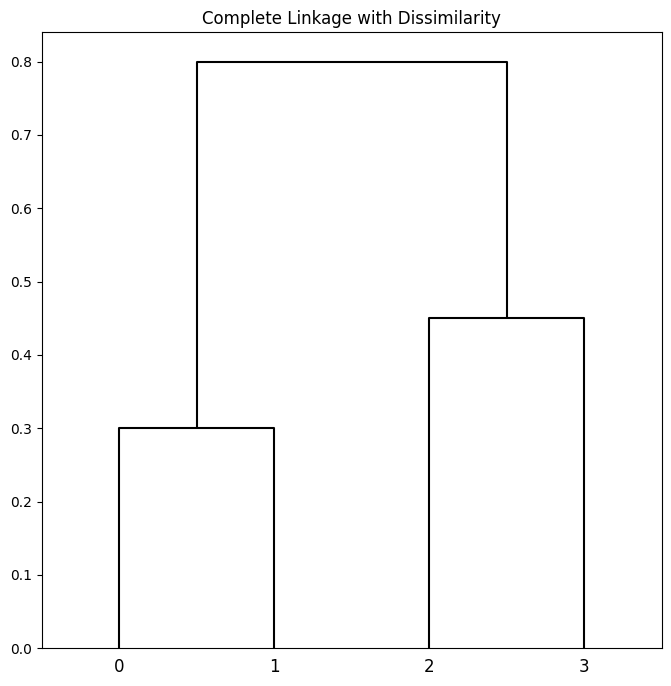

In [39]:
HClust =  AgglomerativeClustering
hc_comp = HClust(linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed')
hc_comp.fit(X)
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
dendrogram(linkage_comp, ax=ax, **cargs)
ax.set_title("Complete Linkage with Dissimilarity")

### **(b)**

Text(0.5, 1.0, 'Single Linkage with Dissimilarity')

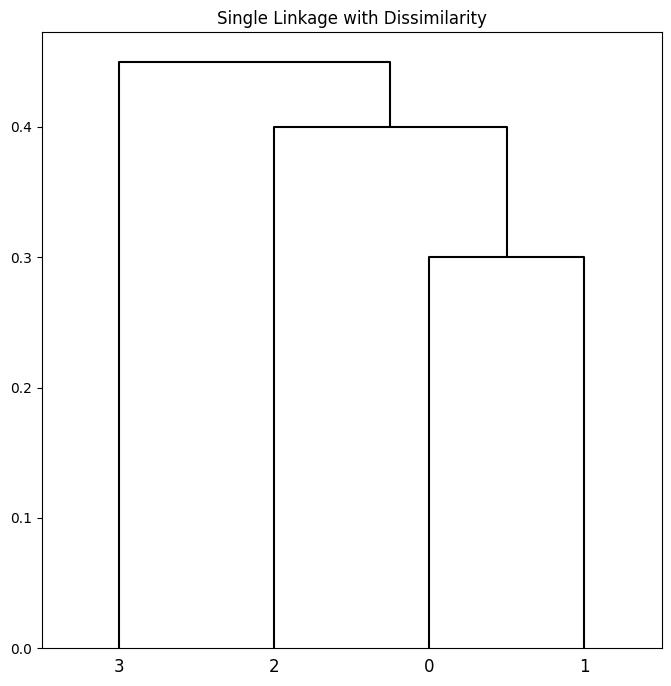

In [40]:
HClust =  AgglomerativeClustering
hc_sing = HClust(linkage='single', distance_threshold=0, n_clusters=None, metric='precomputed')
hc_sing.fit(X)
linkage_sing = compute_linkage(hc_sing)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
dendrogram(linkage_sing, ax=ax, **cargs)
ax.set_title("Single Linkage with Dissimilarity")

### **(c)**

In [43]:
cut_tree(linkage_comp, n_clusters=2).T

array([[0, 0, 1, 1]])

### **(d)**

In [42]:
cut_tree(linkage_sing, n_clusters=2).T

array([[0, 0, 0, 1]])

### **(e)**

In [45]:
perm = [2,3,0,1]
X_prime = np.zeros((4,4))
for i in range(4):
  for j in range(4):
    X_prime[i][j] = X[perm[i]][perm[j]]
X_prime

array([[0.  , 0.45, 0.4 , 0.5 ],
       [0.45, 0.  , 0.7 , 0.8 ],
       [0.4 , 0.7 , 0.  , 0.3 ],
       [0.5 , 0.8 , 0.3 , 0.  ]])

Text(0.5, 1.0, 'Complete Linkage with Dissimilarity')

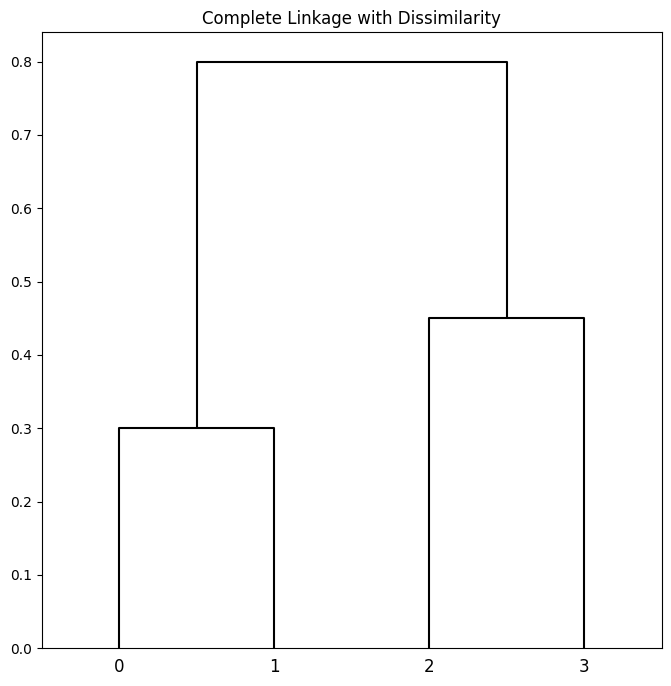

In [56]:
HClust =  AgglomerativeClustering
hc_comp = HClust(linkage='complete', distance_threshold=0.4, n_clusters=None, metric='precomputed')
hc_comp.fit(X)
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
dendrogram(linkage_comp, ax=ax, **cargs)
ax.set_title("Complete Linkage with Dissimilarity")

# **Q 12.3**

### **(a)**

In [65]:
X = np.array([[1,4,0],[1,3,0],[0,4,0],[5,1,0],[6,2,0],[4,0,0]])
X

array([[1, 4, 0],
       [1, 3, 0],
       [0, 4, 0],
       [5, 1, 0],
       [6, 2, 0],
       [4, 0, 0]])

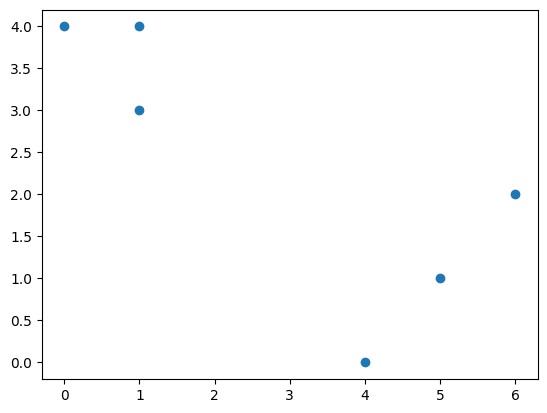

In [61]:
plt.scatter(X[:,0],X[:,1])

### **(b)**

In [80]:
np.random.seed(77)
X[:,2] = np.random.choice(2,6)
X[:,2]

array([1, 1, 0, 0, 1, 1])

### **(c)**

In [81]:
C = np.zeros((2,2))
for i in range(6):
  C[0,:] = np.mean(X[X[:,2]==0][:,:2],axis=0)
  C[1,:] = np.mean(X[X[:,2]==1][:,:2],axis=0)
C

array([[2.5 , 2.5 ],
       [3.  , 2.25]])

### **(d)**

In [82]:
np.sum(np.square(X[0,:2]-C[0,:]))

4.5

In [88]:
for i in range(6):
  if np.sum(np.square(X[i,:2]-C[0,:])) <= np.sum(np.square(X[i,:2]-C[1,:])): # if C1 is closer to the sample
    X[i,2] = 0 # assign cluster 0
  else:
    X[i,2] = 1
X[:,2]

array([0, 0, 0, 1, 1, 1])

### **(e)**

In [84]:
cluster_before = X[:,2]
cluster_before

array([0, 0, 0, 1, 1, 1])

In [87]:
cluster_after = np.empty(6)
while (cluster_after != cluster_before).any():
  for i in range(6):
    C[0,:] = np.mean(X[X[:,2]==0][:,:2],axis=0)
    C[1,:] = np.mean(X[X[:,2]==1][:,:2],axis=0)
  for i in range(6):
    if np.sum(np.square(X[i,:2]-C[0,:])) <= np.sum(np.square(X[i,:2]-C[1,:])): # if C1 is closer to the sample
      X[i,2] = 0 # assign cluster 0
    else:
      X[i,2] = 1
  cluster_after = X[:,2]
print(cluster_before)
print(cluster_after)

[0 0 0 1 1 1]
[0. 0. 0. 1. 1. 1.]


### **(f)**

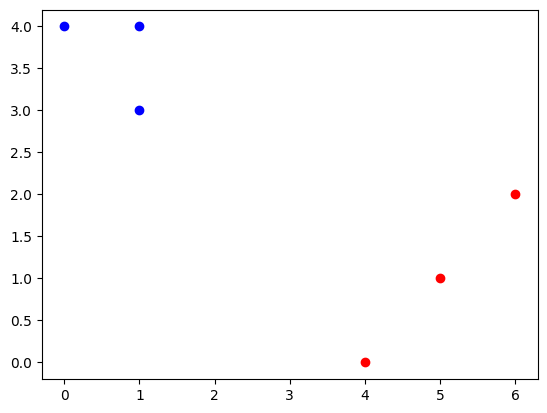

In [90]:
plt.scatter(X[X[:,2]==0][:,0],X[X[:,2]==0][:,1],color='b')
plt.scatter(X[X[:,2]==1][:,0],X[X[:,2]==1][:,1],color='r')

# **Q 12.8**

### **(a)**

In [91]:
USArrests = get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [92]:
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)

In [93]:
pcaUS = PCA()
pcaUS.fit(USArrests_scaled)
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [100]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [95]:
scores = pcaUS.transform(USArrests_scaled)

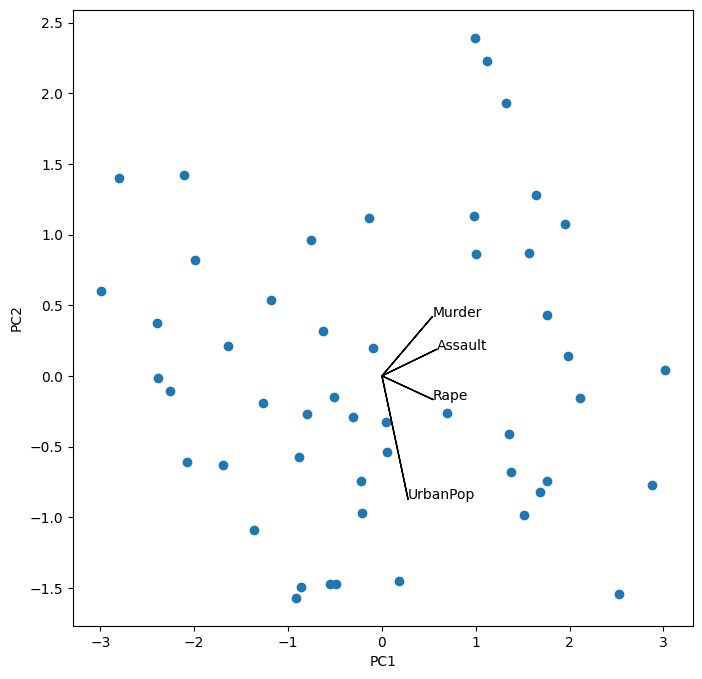

In [96]:
i, j = 0, 1 # which components
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
  ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
  ax.text(pcaUS.components_[i,k], pcaUS.components_[j,k], USArrests.columns[k])

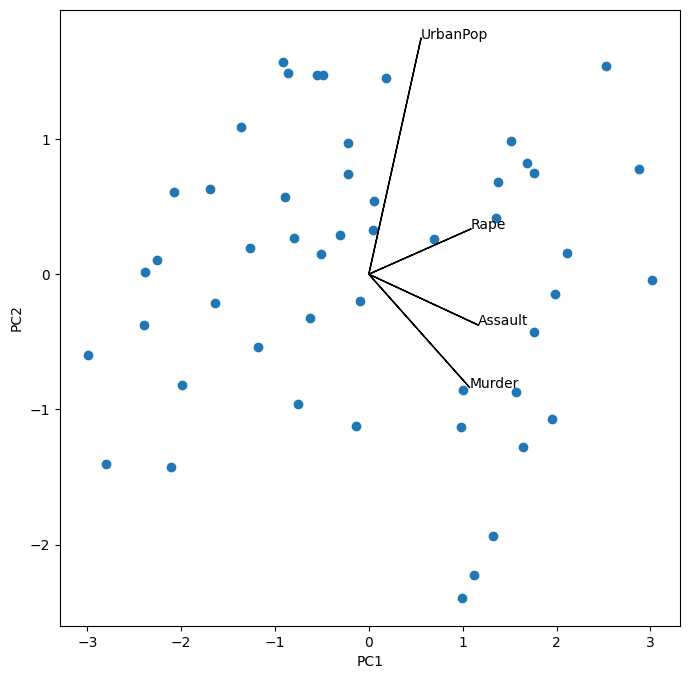

In [98]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
  ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k])
  ax.text(s_*pcaUS.components_[i,k],
  s_*pcaUS.components_[j,k],
  USArrests.columns[k])

### **(b)**

In [101]:
phi = pcaUS.components_
phi

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [103]:
n = len(USArrests_scaled[:,0])
n

50

In [106]:
USArrests_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [116]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [115]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [122]:
pc = []
for p in range(4):
  num = 0
  din = 0
  for i in range(n):
    temp = 0
    for j in range(4):
      temp += phi[p][j]*USArrests_scaled[i][j]
      din += USArrests_scaled[i][j]**2
    num += temp**2
  pc.append(num/din)
pc

[0.6200603947873733,
 0.24744128813496027,
 0.08914079514520752,
 0.043357521932458835]

In [123]:
np.sum(pc)

0.9999999999999999

# **Q 12.9**

### **(a)**

Text(0.5, 1.0, 'Complete Linkage of USArrests')

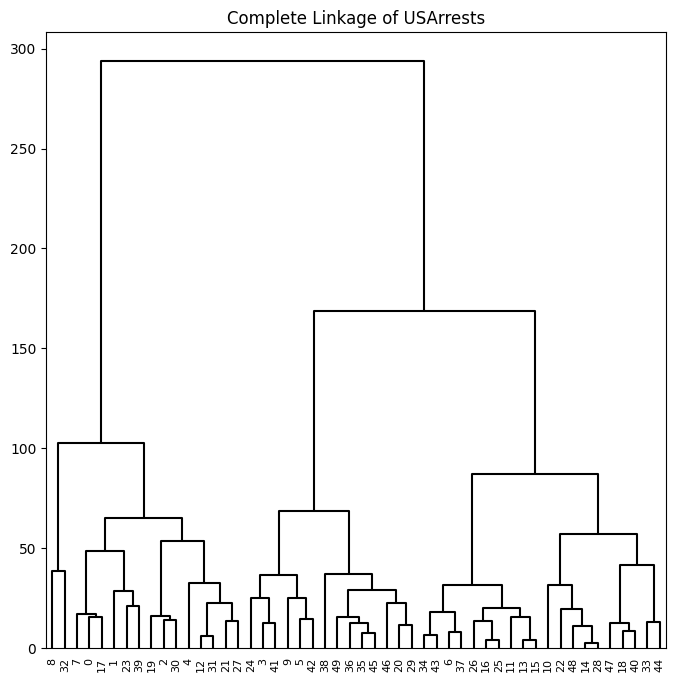

In [125]:
HClust =  AgglomerativeClustering
hc_comp = HClust(linkage='complete', distance_threshold=0, n_clusters=None, metric='euclidean')
hc_comp.fit(USArrests)
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
dendrogram(linkage_comp, ax=ax, **cargs)
ax.set_title("Complete Linkage of USArrests")

### **(b)**

In [128]:
print(cut_tree(linkage_comp, n_clusters=3).T[0][:10])
print(cut_tree(linkage_comp, n_clusters=3).T[0][10:20])
print(cut_tree(linkage_comp, n_clusters=3).T[0][20:30])
print(cut_tree(linkage_comp, n_clusters=3).T[0][30:40])
print(cut_tree(linkage_comp, n_clusters=3).T[0][40:50])

[0 0 0 1 0 1 2 0 0 1]
[2 2 0 2 2 2 2 0 2 0]
[1 0 2 0 1 2 2 0 2 1]
[0 0 0 2 2 1 1 2 1 0]
[2 1 1 2 2 1 1 2 2 1]


### **(c)**

In [130]:
np.std(USArrests_scaled)

1.0

Text(0.5, 1.0, 'Complete Linkage of USArrests')

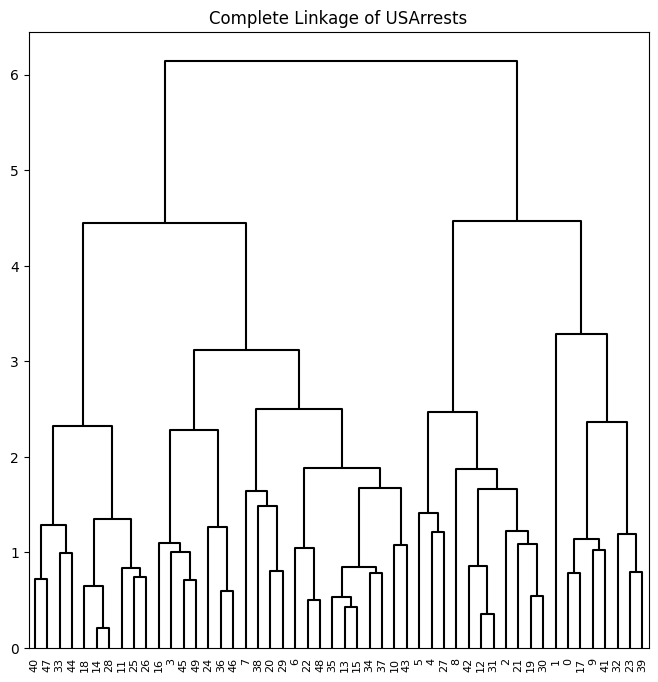

In [131]:
HClust =  AgglomerativeClustering
hc_comp = HClust(linkage='complete', distance_threshold=0, n_clusters=None, metric='euclidean')
hc_comp.fit(USArrests_scaled)
linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cargs = {'color_threshold':-np.inf, 'above_threshold_color':'black'}
dendrogram(linkage_comp, ax=ax, **cargs)
ax.set_title("Complete Linkage of USArrests")

In [132]:
print(cut_tree(linkage_comp, n_clusters=3).T[0][:10])
print(cut_tree(linkage_comp, n_clusters=3).T[0][10:20])
print(cut_tree(linkage_comp, n_clusters=3).T[0][20:30])
print(cut_tree(linkage_comp, n_clusters=3).T[0][30:40])
print(cut_tree(linkage_comp, n_clusters=3).T[0][40:50])

[0 0 1 2 1 1 2 2 1 0]
[2 2 1 2 2 2 2 0 2 1]
[2 1 2 0 2 2 2 1 2 2]
[1 1 0 2 2 2 2 2 2 0]
[2 0 1 2 2 2 2 2 2 2]


# **Q 12.13**

### **(a)**

In [133]:
Genes = pd.read_csv("/content/Ch12Ex13.csv",header=None)
Genes.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [134]:
Genes.shape

(1000, 40)

### **(b)**

In [137]:
corr_matrix = (Genes.transpose()).corr()
print(corr_matrix)

          0         1         2         3         4         5         6    \
0    1.000000 -0.232669 -0.080650  0.241167  0.113527 -0.213879  0.151273   
1   -0.232669  1.000000 -0.355712  0.120525 -0.374779  0.298627 -0.015189   
2   -0.080650 -0.355712  1.000000 -0.144035 -0.184695 -0.231885  0.058840   
3    0.241167  0.120525 -0.144035  1.000000  0.151851 -0.118362 -0.107088   
4    0.113527 -0.374779 -0.184695  0.151851  1.000000 -0.097715  0.040587   
..        ...       ...       ...       ...       ...       ...       ...   
995 -0.041858  0.089107  0.181904  0.017418 -0.158308 -0.064343 -0.223018   
996  0.007666 -0.273232  0.229767 -0.022768  0.096145  0.040062  0.103200   
997 -0.186221  0.060401 -0.042442  0.036338 -0.001575 -0.041796 -0.331822   
998 -0.126661 -0.069104  0.219789 -0.063557 -0.182823 -0.121470  0.068331   
999  0.180729 -0.113426 -0.027445  0.037852 -0.096418 -0.285549 -0.057606   

          7         8         9    ...       990       991       992  \
0  

In [145]:
corD = 1 - np.corrcoef(Genes.transpose())
corD.shape

(40, 40)

Text(0.5, 1.0, 'Complete Linkage with Correlation -Based Dissimilarity')

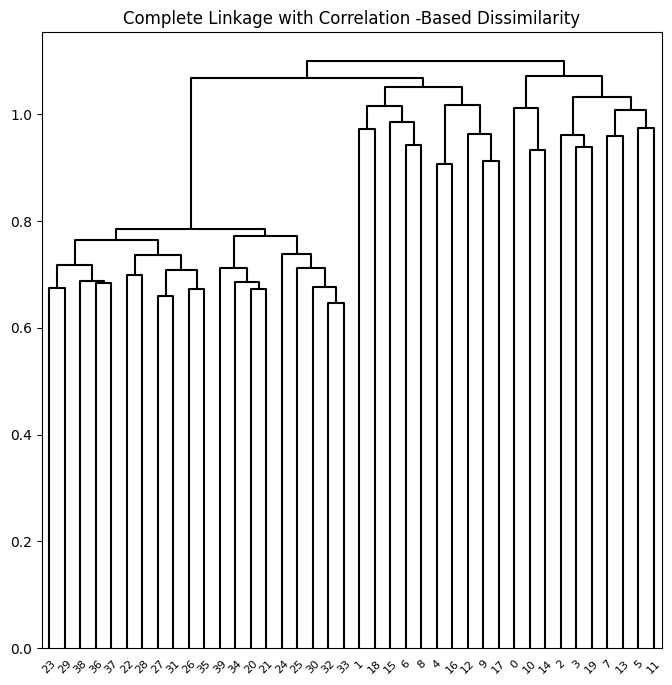

In [151]:
hc_cor = HClust(linkage='complete', distance_threshold=0, n_clusters=None, metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Complete Linkage with Correlation -Based Dissimilarity")

In [154]:
print(cut_tree(linkage_cor, n_clusters=3).T[0][:10])
print(cut_tree(linkage_cor, n_clusters=3).T[0][10:20])
print(cut_tree(linkage_cor, n_clusters=3).T[0][20:30])
print(cut_tree(linkage_cor, n_clusters=3).T[0][30:40])

[0 1 2 2 1 2 1 2 1 1]
[0 2 1 2 0 1 1 1 1 2]
[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


### **(c)**

In [157]:
c1 = [23,29,38,36,37,22,28,27,31,26,35,39,34,20,21,24,25,30,32,33]
c2 = [1,18,15,6,8,4,16,12,9,17,0,10,14,2,3,19,7,13,5,11]

In [158]:
Genes.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [163]:
l1 = len(c1)
l2 = len(c2)
avg1 = np.zeros(1000)
avg2 = np.zeros(1000)
for i in range(l1):
  avg1 += Genes.iloc[:,c1[i]]
avg1 = avg1/l1
for i in range(l2):
  avg2 += Genes.iloc[:,c2[i]]
avg2 = avg1/l2

diff = np.abs(avg1-avg2)
imp_gene = np.argmax(diff)
print(imp_gene)


550


In [164]:
print(avg1[550],avg2[550])

2.5246711 0.126233555


Text(0.5, 1.0, 'Single Linkage with Correlation -Based Dissimilarity')

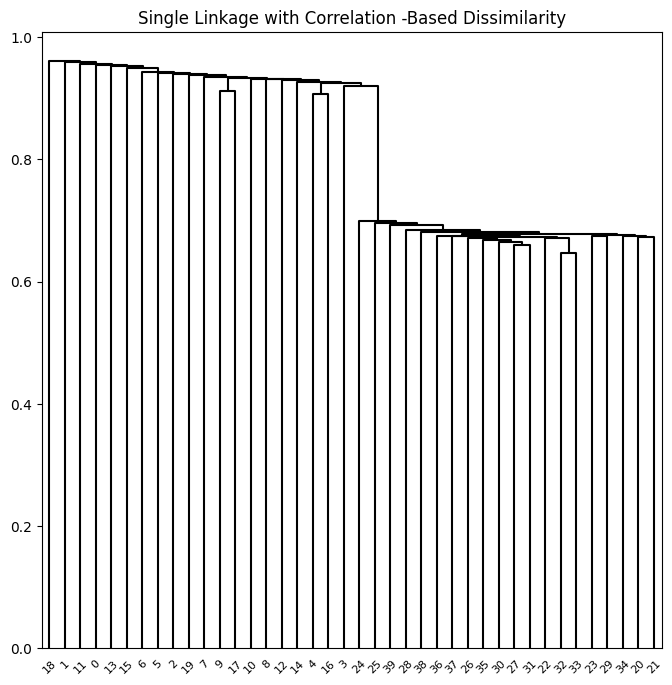

In [149]:
hc_cor = HClust(linkage='single', distance_threshold=0, n_clusters=None, metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage(hc_cor)
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_cor , ax=ax, **cargs)
ax.set_title("Single Linkage with Correlation -Based Dissimilarity")

### **(c)**